# Spaceship Titanic: Predicting Transportation of Passengers

> This notebook is from Kaggle's Getting Started Competitions. For more information, please follow [here](https://www.kaggle.com/competitions/spaceship-titanic/overview).
>

## Overview

As mentioned above, the overall goal of this competition is to accurately predict whether passengers of spaceship Titanic successfully transported to another dimension or not. All datasets can be found [here](https://www.kaggle.com/competitions/spaceship-titanic/data).

## Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

## Check dataset
- Check null data
- Check target label distribution
-

In [2]:
# import datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### Null data check

In [4]:
# Check percentage of null data
print('Percent of NaN value for each columns in train dataset')
for col in train.columns:
    msg = '{}: {}%'.format(col, round(100 * (train[col].isnull().sum() / train[col].shape[0]),2))
    print(msg)

Percent of NaN value for each columns in train dataset
PassengerId: 0.0%
HomePlanet: 2.31%
CryoSleep: 2.5%
Cabin: 2.29%
Destination: 2.09%
Age: 2.06%
VIP: 2.34%
RoomService: 2.08%
FoodCourt: 2.11%
ShoppingMall: 2.39%
Spa: 2.11%
VRDeck: 2.16%
Name: 2.3%
Transported: 0.0%


In [5]:
# Check percentage of null data
print('Percent of NaN value for each columns in test dataset')
for col in test.columns:
    msg = '{}: {}%'.format(col, round(100 * (test[col].isnull().sum() / test[col].shape[0]),2))
    print(msg)

Percent of NaN value for each columns in test dataset
PassengerId: 0.0%
HomePlanet: 2.03%
CryoSleep: 2.17%
Cabin: 2.34%
Destination: 2.15%
Age: 2.13%
VIP: 2.17%
RoomService: 1.92%
FoodCourt: 2.48%
ShoppingMall: 2.29%
Spa: 2.36%
VRDeck: 1.87%
Name: 2.2%


### Check target label

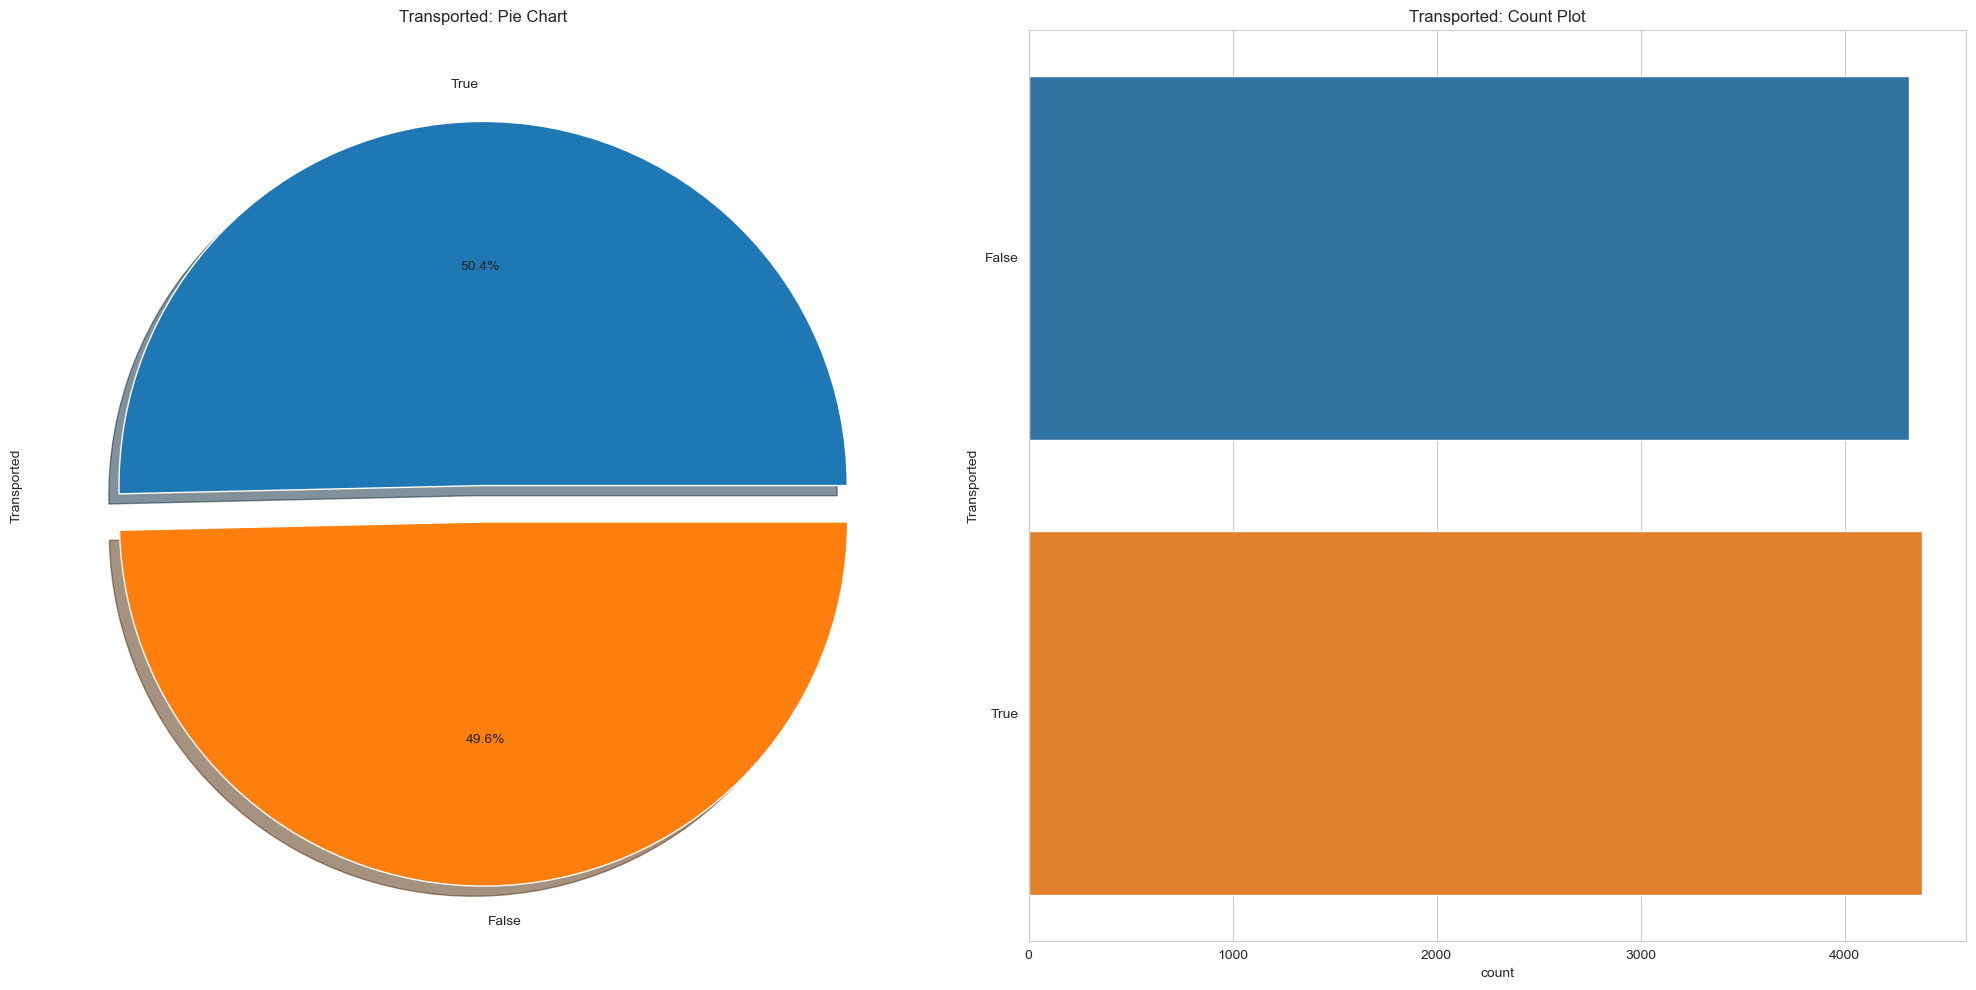

In [6]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

train['Transported'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Transported: Pie Chart')

sns.countplot(ax=ax[1], y='Transported', data=train)
ax[1].set_title('Transported: Count Plot')

plt.tight_layout()

### Observations

1. Almost half of the passengers were able to transport.
2. There are very few NaN values in datasets.

## Exploratory Data Analysis

### HomePlanet

- HomePlanet is categorical and nominal data, meaning there is no order scale and written in natural language description.
- First, I will check transportation rate depending on HomePlanet.

In [7]:
train[['HomePlanet', 'Transported']].groupby(['HomePlanet']).count()

,Transported
HomePlanet,
Earth,4602
Europa,2131
Mars,1759


In [8]:
train[['HomePlanet', 'Transported']].groupby(['HomePlanet']).sum()

,Transported
HomePlanet,
Earth,1951
Europa,1404
Mars,920


In [9]:
pd.crosstab(train['HomePlanet'], train['Transported'], margins=True).style.background_gradient(cmap='summer_r')

Transported,False,True,All
HomePlanet,,,
Earth,2651,1951,4602
Europa,727,1404,2131
Mars,839,920,1759
All,4217,4275,8492


[Text(0.5, 1.0, 'Bar Plot: Transportation Rate Based on Home Planet')]

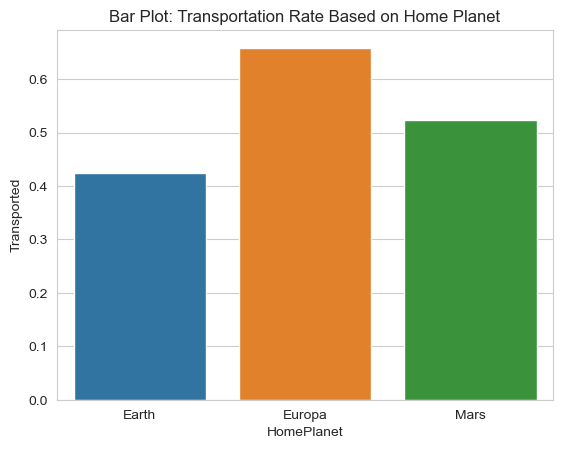

In [10]:
planet_df = train[['HomePlanet', 'Transported']].groupby(['HomePlanet']).mean().reset_index()
sns.barplot(data=planet_df, x='HomePlanet', y='Transported').set(title='Bar Plot: Transportation Rate Based on Home Planet')

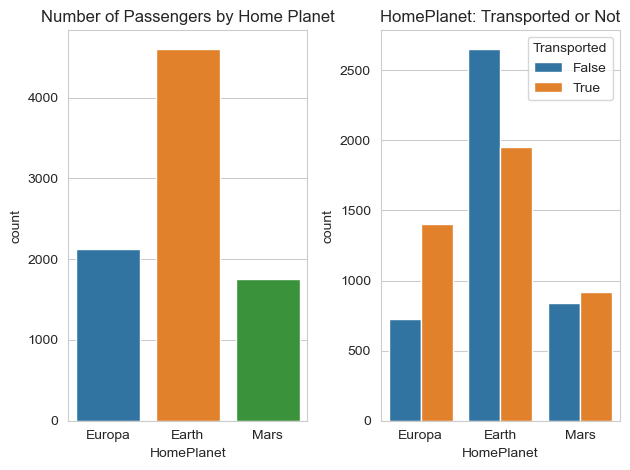

In [11]:
f, ax = plt.subplots(nrows=1, ncols=2)

sns.countplot(x=train['HomePlanet'], ax=ax[0])
sns.countplot(x=train['HomePlanet'], hue=train['Transported'], ax=ax[1])

ax[0].set(title='Number of Passengers by Home Planet')
ax[1].set(title='HomePlanet: Transported or Not')

plt.tight_layout()
plt.show()

#### Observations
- If passenger is from Europa, passenger is more likely to be transported.
- If passenger is from Earth, passenger is less likely to be transported.
- Nearly half of the passengers were from Earth.

### CryoSleep

CryoSleep is a boolean categorical variable, meaning if passenger was in Cryosleep, variable will be True.
If passenger was in cryosleep, passenger must be in the cabin.

In [19]:
train[['CryoSleep', 'Transported']].groupby('CryoSleep').mean()

,Transported
CryoSleep,
False,0.328921
True,0.817583


[Text(0.5, 1.0, 'Bar Plot: Transportation Rate Based on Cryosleep Status')]

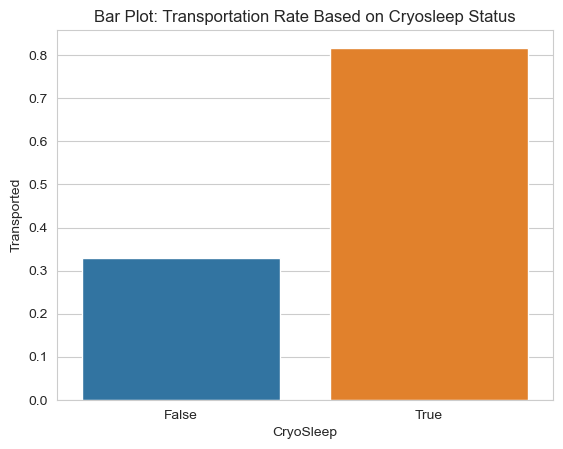

In [20]:
cryo_df = train[['CryoSleep', 'Transported']].groupby('CryoSleep').mean().reset_index()
sns.barplot(data=cryo_df, x='CryoSleep', y='Transported').set(title='Bar Plot: Transportation Rate Based on Cryosleep Status')

#### Observations
- If passenger was in cryosleep, passenger is more likely to be transported.

HomePlanet and Cryosleep

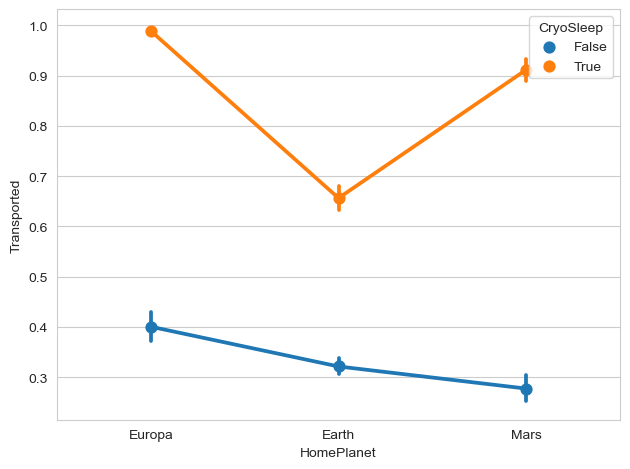

In [29]:
sns.pointplot(x='HomePlanet', y='Transported', hue='CryoSleep', data=train)
plt.tight_layout()
plt.show()

#### Observation
- Regardless of Home Planet, if passenger is in cryosleep, passenger is more likely to be transported.
- Also passengers from Europa is more likely to be transported.

### Age
Age is ordinal data.

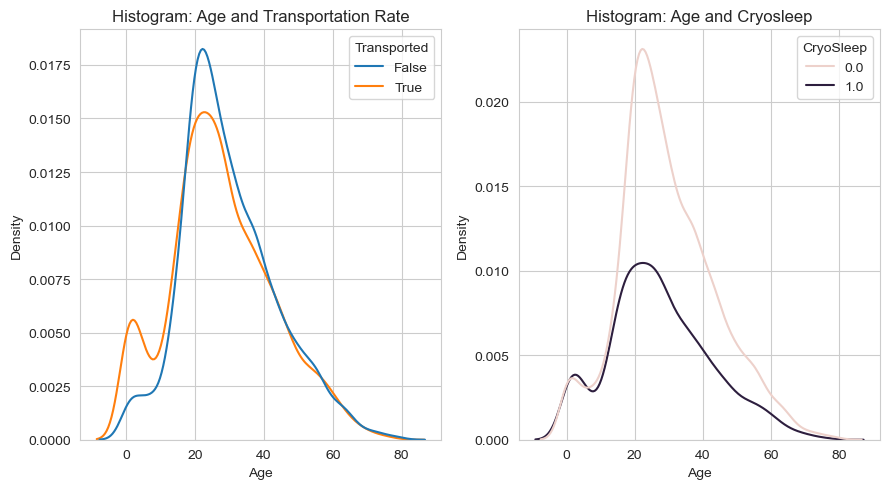

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(9, 5))
sns.kdeplot(x=train['Age'], hue=train['Transported'], ax=ax[0]).set(title='Histogram: Age and Transportation Rate')
sns.kdeplot(x=train['Age'], hue=train['CryoSleep'], ax=ax[1]).set(title='Histogram: Age and Cryosleep')

plt.tight_layout()
plt.show()

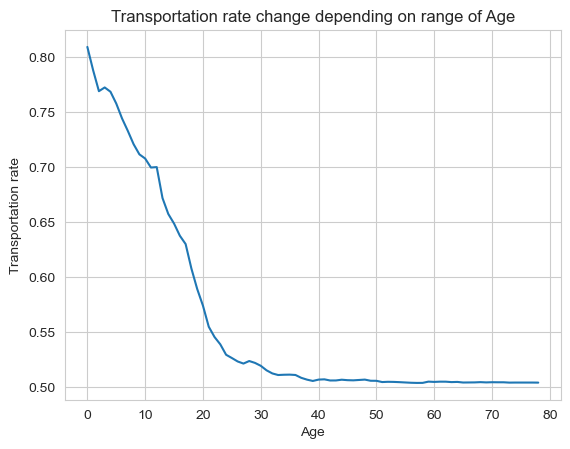

In [54]:
cummulate_transportation_ratio = []
for i in range(1, 80):
    cummulate_transportation_ratio.append(train[train['Age'] < i]['Transported'].sum() / len(train[train['Age'] < i]['Transported']))
plt.plot(cummulate_transportation_ratio)
plt.title('Transportation rate change depending on range of Age')
plt.ylabel('Transportation rate')
plt.xlabel('Age')
plt.show()


#### Observation
- Younger passengers are more likely to be transported

### Homeplanet, CryoSleep, and Age

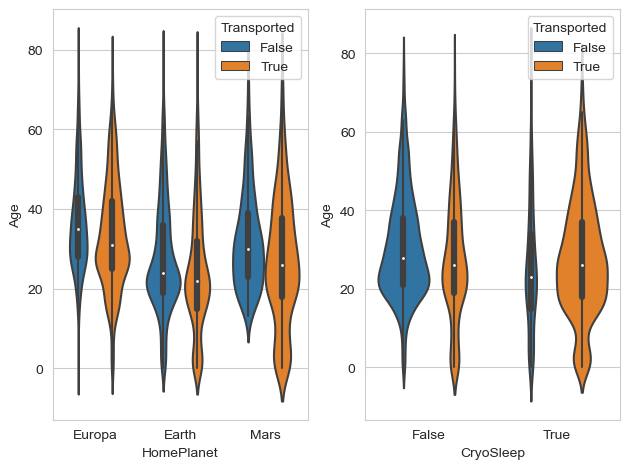

In [63]:
f, ax = plt.subplots(nrows=1, ncols=2)
sns.violinplot(data=train, x='HomePlanet', y='Age', hue='Transported', scale='count', ax=ax[0])

sns.violinplot(data=train, x='CryoSleep', y='Age', hue='Transported', scale='count', ax=ax[1])
f.tight_layout()
f.show()

- Passengers who were in cryosleep and young were more likely to be transported.

### VIP

In [66]:
train[['VIP', 'Transported']].groupby('VIP').mean()

,Transported
VIP,
False,0.506332
True,0.381910


[Text(0.5, 1.0, 'Bar Plot: Transportation Rate Based on VIP Status')]

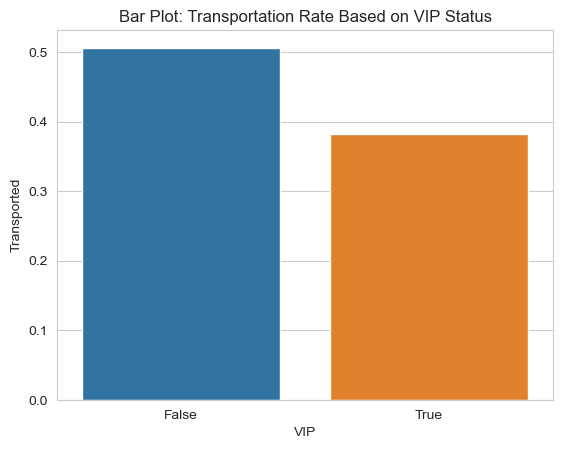

In [67]:
vip_df = train[['VIP', 'Transported']].groupby('VIP').mean().reset_index()
sns.barplot(data=vip_df, x='VIP', y='Transported').set(title='Bar Plot: Transportation Rate Based on VIP Status')

### Luxury Amenities: RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
Added all of these into one column for luxuries bill.

Using this information, we can predict null values for VIP status using classification algorithms.

In [70]:
train['TotalBill'] = train['RoomService'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck']
test['TotalBill'] = test['RoomService'] + test['FoodCourt'] + test['ShoppingMall'] + test['Spa'] + test['VRDeck']

train['TotalBill'].describe()

count     7785.000000
mean      1484.601541
std       2845.288241
min          0.000000
25%          0.000000
50%        736.000000
75%       1486.000000
max      35987.000000
Name: TotalBill, dtype: float64

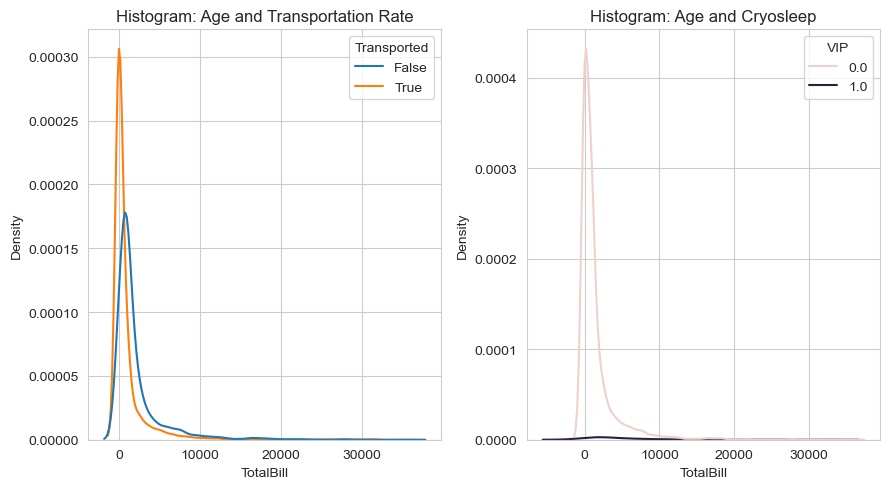

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(9, 5))
sns.kdeplot(x=train['TotalBill'], hue=train['Transported'], ax=ax[0]).set(title='Histogram: Age and Transportation Rate')
sns.kdeplot(x=train['TotalBill'], hue=train['VIP'], ax=ax[1]).set(title='Histogram: Age and Cryosleep')

plt.tight_layout()
plt.show()